In [43]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets
exchange = 'BINANCE'


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [44]:
mcs_path = Path("Data_files/mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"
mc_df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Days,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003005,0.961189,1.015599,1.007914,1.001219,1.027228,0.989580,1.002537,0.992765,1.041070,...,1.016755,1.012825,0.997745,1.015118,1.030701,1.039271,1.007328,1.053623,0.983562,0.986492
2,1.025367,0.957679,1.037135,0.998525,1.013387,1.018266,0.973411,1.017457,1.034078,1.047762,...,1.001293,1.045749,1.031371,1.003836,1.034541,1.046731,1.005474,1.043483,0.989080,0.995813
3,1.004662,0.945890,1.034358,1.029601,1.005713,1.016813,0.978511,1.025697,1.054406,1.059179,...,0.979967,1.024371,1.046257,1.015657,1.036057,1.030453,1.014542,1.082316,0.994972,1.034376
4,1.022878,0.953683,1.020183,1.042619,0.990457,1.006580,0.968954,1.034335,1.012777,1.109246,...,0.986235,1.045138,1.079355,1.001254,1.013821,1.013061,1.066422,1.085010,0.979896,1.080114
5,1.015641,0.959388,1.034237,1.053252,1.000448,0.982245,0.991399,1.065781,1.034419,1.130593,...,1.028455,0.990027,1.085515,1.009230,1.016698,1.002181,1.086322,1.051365,0.982983,1.109773
6,1.011054,0.946848,1.070398,1.079259,1.020565,0.989264,0.980451,1.055931,1.034398,1.095146,...,1.022316,1.006480,1.057273,1.003668,1.047343,0.986401,1.102768,1.077006,0.992057,1.153000
7,1.040044,0.906013,1.047282,1.098701,1.044891,0.998865,0.976773,1.073388,1.072194,1.098887,...,1.028080,0.999163,1.072588,0.987844,1.002511,0.987259,1.095773,1.064204,1.003665,1.151972
8,1.069838,0.893138,1.047054,1.132724,1.063476,1.035978,1.010941,1.063675,1.080870,1.087726,...,1.049375,1.003477,1.078679,0.967142,1.012560,1.007822,1.111953,1.031106,0.995931,1.122036


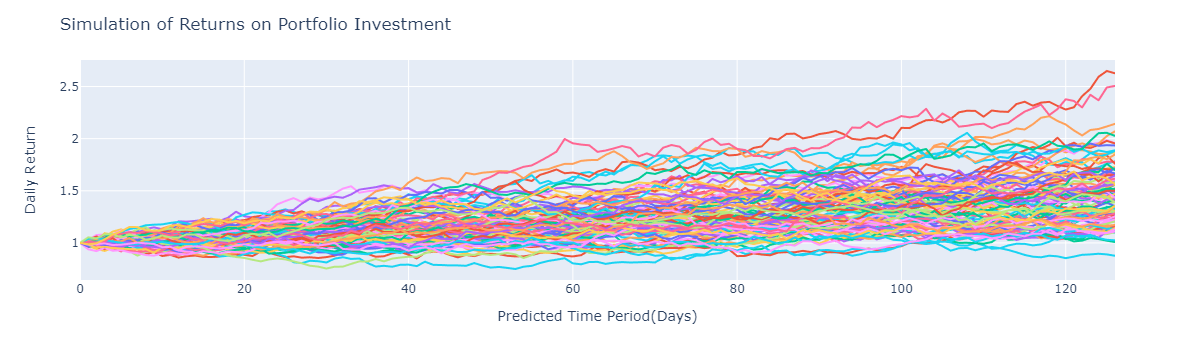

In [45]:
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig1.show()

In [46]:
#use dataframe of stats for daily returns of simulation from aarons part as well
mc_path = Path("Data_files/mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns
df_simulated_returns.head()

,mean,median,min,max
Days,,,,
0,1.000000,1.000000,1.000000,1.000000
1,1.002895,1.000243,0.964662,1.049313
2,1.004440,1.004750,0.946939,1.082312
3,1.008110,1.006622,0.920939,1.132328
4,1.012032,1.011019,0.904845,1.170405


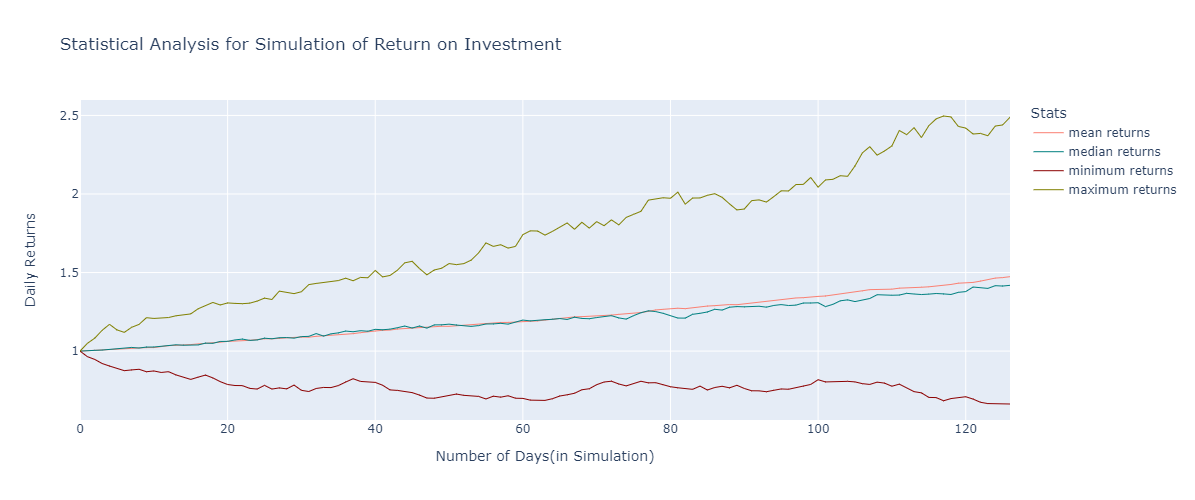

In [47]:

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")
fig2.show()

In [48]:
# Set initial investment
initial_investment = 11999

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
Days,,,,
0,11999.000000,11999.000000,11999.000000,11999.000000
1,12033.734123,12001.920848,11574.976702,12590.710356
2,12052.275401,12055.996647,11362.324478,12986.657895
3,12096.308923,12078.455147,11050.342897,13586.800341
4,12143.370058,12131.211674,10857.235589,14043.686666


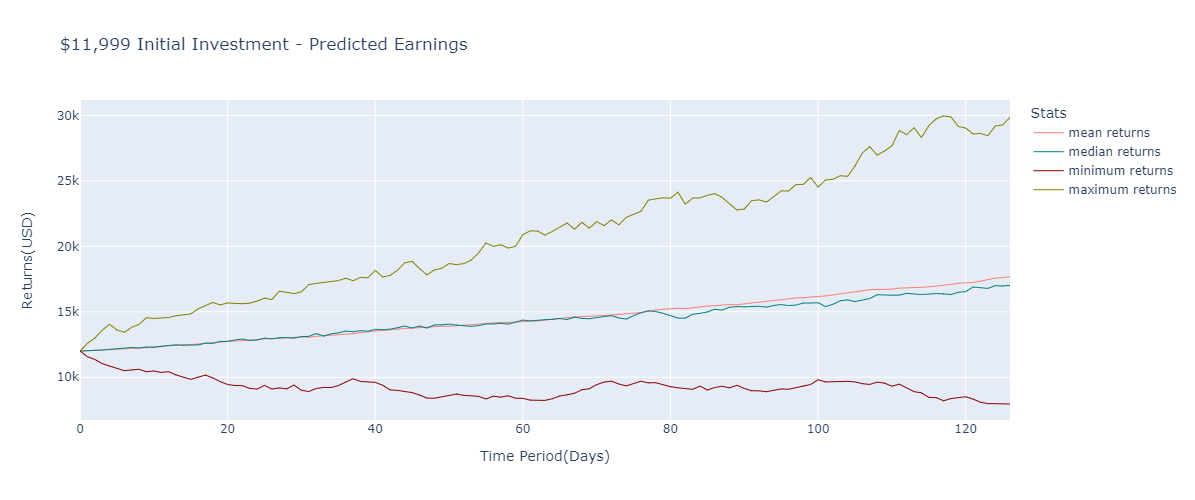

You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!
This simulation can help you visualize what your portfolio may look like in the days following your initial investment.
Let's take a look at some other coins that are popularly traded right now.


In [49]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 = fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig3.show()

print("You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize what your portfolio may look like in the days following your initial investment.")
print("Let's take a look at some other coins that are popularly traded right now.")


crypataras_picks = pd.read_csv('Data_files/cryptaras_final_cryptos.csv', index_col=[0])
crypataras_picks = crypataras_picks.values.tolist()
type(crypataras_picks)

In [97]:
ticker_1_df.head(3)

,datetime,symbol,open,high,low,close,volume,sma,std
0,2021-07-24 19:00:00,BINANCE:BUSDBRL,5.233,5.234,5.195,5.204,3669128.09,NaN,NaN
1,2021-07-25 19:00:00,BINANCE:BUSDBRL,5.203,5.234,5.123,5.221,9666898.10,NaN,NaN
2,2021-07-26 19:00:00,BINANCE:BUSDBRL,5.221,5.230,5.187,5.206,5888964.01,NaN,NaN


In [99]:
#read in COINBASE ticker dataframe
df_daily = pd.read_csv('Data_files/daily_ohlc.csv', index_col=[0])
crypataras_picks = pd.read_csv('Data_files/cryptaras_final_cryptos.csv', index_col=[0])
crypataras_picks = crypataras_picks.values.tolist()

ticker_1_df = pd.read_csv('Data_files/ticker_1.csv', index_col=[0])
ticker_2_df = pd.read_csv('Data_files/ticker_2.csv', index_col=[0])
ticker_3_df = pd.read_csv('Data_files/ticker_3.csv', index_col=[0])
ticker_4_df = pd.read_csv('Data_files/ticker_4.csv', index_col=[0])
ticker_5_df = pd.read_csv('Data_files/ticker_5.csv', index_col=[0])
df_daily.index.name = "Date"

#.loc COINBASE tickers Symbol, Open, High, Low, Close, Volume data as new df
ticker_1_df=ticker_1_df.tail(60).reset_index()
ticker_2_df=ticker_2_df.tail(60).reset_index()
ticker_3_df=ticker_3_df.tail(60).reset_index()
ticker_4_df=ticker_4_df.tail(60).reset_index()
ticker_5_df=ticker_5_df.tail(60).reset_index()

In [103]:

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")

# calculate sma and std for upper and lower bb for each df in df_list
df_list = [ticker_1_df, ticker_2_df, ticker_3_df, ticker_4_df, ticker_5_df]
WINDOW=30

for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
    
    
    # Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
    fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])

# Candlestick Plot
    fig.add_trace(go.Candlestick(x = df['Date'],
                                 open = df['open'],
                                 high = df['high'],
                                 low = df['low'],
                                 close = df['close'], showlegend=False,
                                 increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                                 name = 'candlestick'),
                  row = 1, col = 1)

# Moving Average
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'],
                             line_color = 'black',
                             name = 'sma'),
                  row = 1, col = 1)
    
# Upper Bound
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] + (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] - (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Labels & Titles
    fig.update_layout(
        height=500,
        width=1200,
        xaxis_title=None,
        yaxis_title="Price",
        legend_title="Indicators",
        )
# ----------------

# Volume Plot
    fig.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=True)


    fig.show();    
   


When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.
When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.


KeyError: 'Date'

In [59]:
#candlestick charts
for df in df_list:
    fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'],
                       increasing_line_color= 'olive', decreasing_line_color= 'darkred')
        
    ])
    fig.update(layout_xaxis_rangeslider_visible=True)
    fig.update_layout(
        height=500,
        width=1200,
        title=f'{df.symbol[0]} Daily Price',
        xaxis_title='Date',
        yaxis_title='Daily Price')
    fig.show()


TypeError: list indices must be integers or slices, not str

In [104]:
# dashboard components

# mcsftool plot simulation (120)
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')

#stat plot 
fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2 =fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")

#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 =fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")



In [105]:
monte_column = pn.Column("## Monte Carlo Simulations", fig1)

In [106]:
return_stats = pn.Column("##Return Stats", fig2)

In [107]:
investment_sim = pn.Column("## Investment Predictions", fig3)

In [108]:
simulations = pn.Tabs(
    (
        "Monte Carlo Simulations",
        fig1
    ),
    (
        "Return Stats",
        fig2
    ),
    (
        "Investment Predictions",
        fig3
    )
)
#simulations

In [109]:
dashboard = pn.Tabs(
    ("Predicted Earnings",monte_column),
    ( "Return Stats",return_stats),
    ("Investment Predictions",fig3)
)

In [110]:
pn.serve(dashboard)

Launching server at http://localhost:50418


In [ ]:
#reference v2 for additional updates in visualization section